<h1> DBSCAN Cluster analysis with PCA </h1>

The results of the dbscan clustering with PCA are recorded in this notebook. It can be seen that the clusters are still very difficult to identify and interpret even with PCA.

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
data = pd.read_csv("data\\analysis_dataset.csv", sep=";")
del data["Unnamed: 0"]
del data["coin"]
del data["axis"]
del data["mindiam"]
del data["findspot"]

Impute missing values

In [14]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp_data = data.copy()
head = data.columns
for col in data.columns:
    imp.fit(np.array(data[col]).reshape(-1,1))
    imp_data[col] = imp.transform(np.array(data[col]).reshape(-1,1))
imp_data = pd.DataFrame(imp_data, columns=head)

do simple PCA

In [15]:
pca = PCA(n_components=2)
pca.fit(imp_data)
X_pca = pca.transform(imp_data)


DBSCAN Clustering with X_pca and plotting of results. Problem: a lot with category= -1 -> Implies no clustering

49 verschiedene Cluster.
Shape not nan Cluster data: (3703, 3)


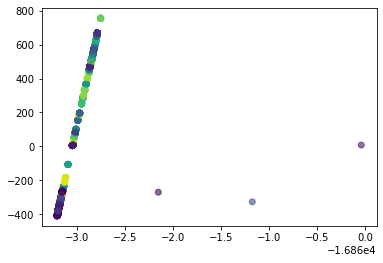

In [16]:
clustering = DBSCAN(eps=3, min_samples=10).fit(X_pca)

labels = clustering.labels_
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["labels"] = labels
data["labels"] = labels
print(f"{len(set(labels.tolist()))} verschiedene Cluster.")
data_notnan = df_pca[df_pca["labels"]!=-1]
print(f"Shape not nan Cluster data: {data_notnan.shape}")


plt.scatter(data_notnan.PCA1, data_notnan.PCA2, c=data_notnan.labels, alpha = 0.6)
plt.show()


Explore original Cluster mit Labels:

In [18]:
data["labels"] = labels
data_org_notnan = data[data["labels"]!=-1]
data_notnan_agg = data_org_notnan.groupby("labels").agg(["mean", "count"])
print(data_notnan_agg)

          maxdiam           weight           enddate         startdate        \
             mean count       mean count        mean count        mean count   
labels                                                                         
0       21.814423   104   6.517000    30  161.991667   120  139.650000   120   
1       24.230882    68  10.242083    24  247.697479   119  239.201681   119   
2       22.076471    17   6.838571     7  158.526316    19  127.315789    19   
3       20.957534    73   5.317273    22  -10.000000    14  -80.000000    14   
4       24.797366  1101   9.596600   500  218.961827  1467  204.160873  1467   
5       17.000524   191  12.404500    60 -345.453202   203 -401.014778   203   
6       16.394872    39   3.580526    19  -71.948718    39 -128.153846    39   
7       14.000323   310   6.587514   177 -475.080645   310 -549.919355   310   
8       16.138889   108  12.917843    51 -410.000000   109 -475.000000   109   
9       25.496703    91   9.702500    40

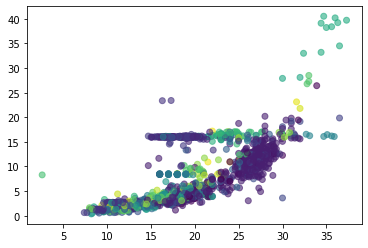

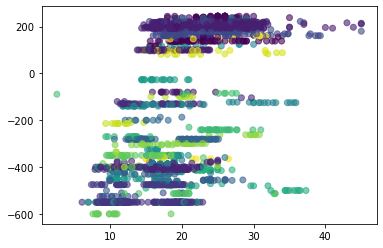

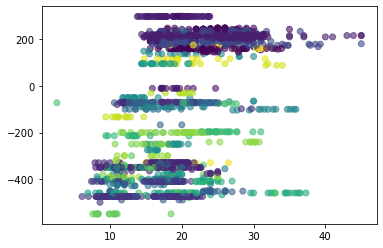

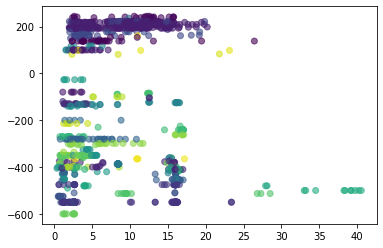

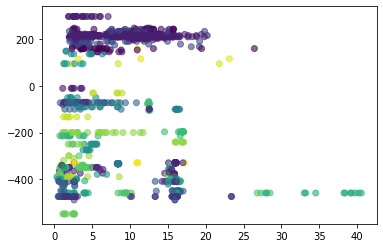

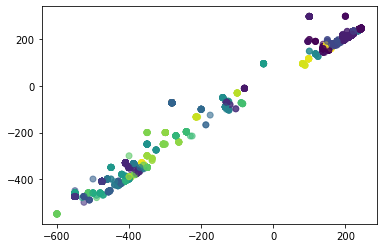

In [24]:
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.weight, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.startdate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.weight, data_org_notnan.startdate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.weight, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.startdate, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()





Try to improve dbscan algorithm with different parameters. For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996). Try to find best epsilon by using 20 nearest neighbors

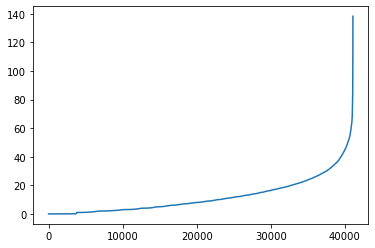

In [25]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


best epsilon is between 20 and 40. So we choose 30

970 verschiedene Cluster.
Shape not nan Cluster data: (32426, 3)


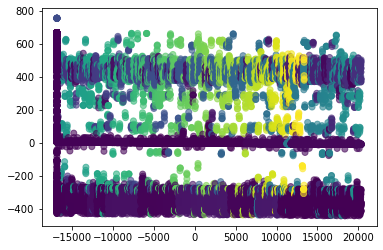

In [26]:
clustering2 = DBSCAN(eps=30, min_samples=4).fit(X_pca)

labels = clustering2.labels_
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["labels"] = labels
data["labels"] = labels
print(f"{len(set(labels.tolist()))} verschiedene Cluster.")
data_notnan = df_pca[df_pca["labels"]!=-1]
print(f"Shape not nan Cluster data: {data_notnan.shape}")


plt.scatter(data_notnan.PCA1, data_notnan.PCA2, c=data_notnan.labels, alpha = 0.6)
plt.show()

Plot not nan values with numerical features. 

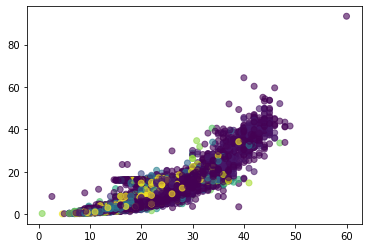

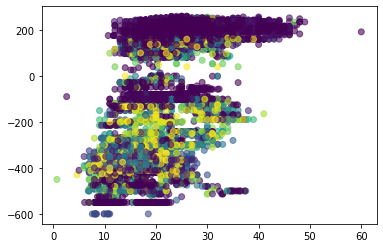

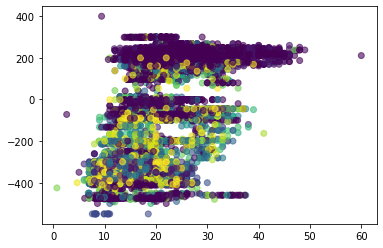

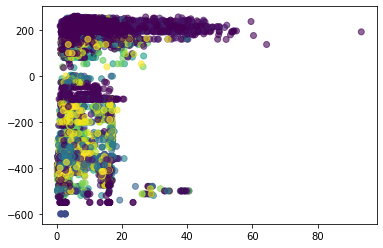

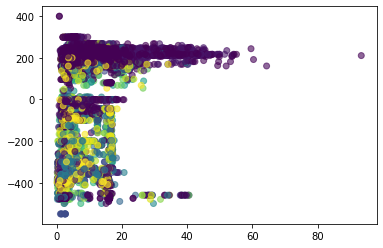

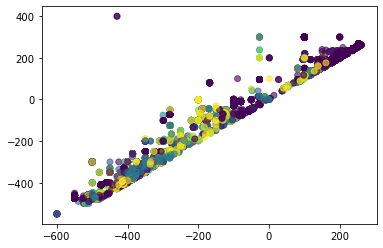

In [27]:
data["labels"] = labels
data_org_notnan = data[data["labels"]!=-1]
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.weight, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.startdate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.weight, data_org_notnan.startdate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.weight, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.startdate, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()



New dbscan clustering top 10 number of observations per cluster

In [38]:
data_notnan_agg = data_org_notnan.groupby("labels")["material_ ae "].agg(["count"])
print(data_notnan_agg.sort_values("count").tail(10))

        count
labels       
15       1036
9        1039
16       1149
6        1197
38       1246
18       1777
2        2129
0        2363
5        2759
1        3184


try to improve PCA analysis by setting components to 5.

95 verschiedene Cluster.
Shape not nan Cluster data: (4651, 6)


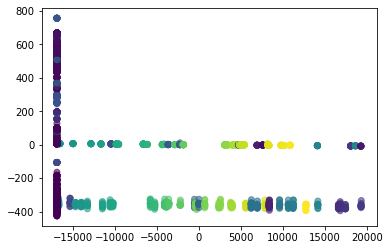

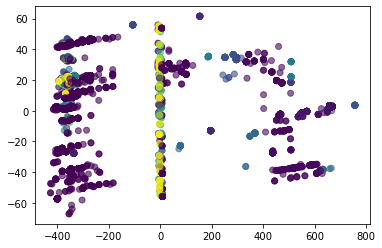

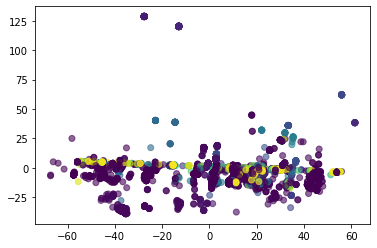

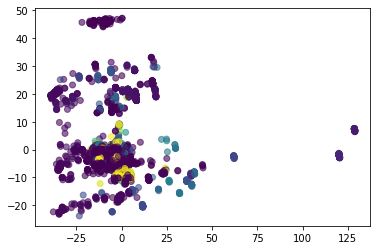

In [44]:
pca = PCA(n_components=5)
pca.fit(imp_data)
X_pca = pca.transform(imp_data)
clustering3 = DBSCAN(eps=30, min_samples=10).fit(X_pca)

labels = clustering3.labels_
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2","PCA3", "PCA4", "PCA5" ])
df_pca["labels"] = labels
data["labels"] = labels
print(f"{len(set(labels.tolist()))} verschiedene Cluster.")
data_notnan = df_pca[df_pca["labels"]!=-1]
print(f"Shape not nan Cluster data: {data_notnan.shape}")

for i in range(1,5):
    plt.scatter(data_notnan[f"PCA{i}"], data_notnan[f"PCA{i+1}"], c=data_notnan.labels, alpha = 0.6)
    plt.show()

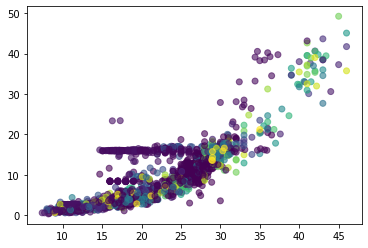

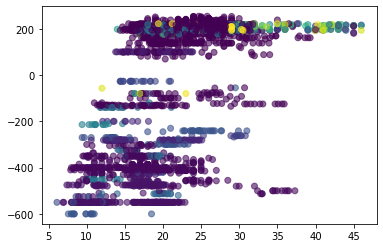

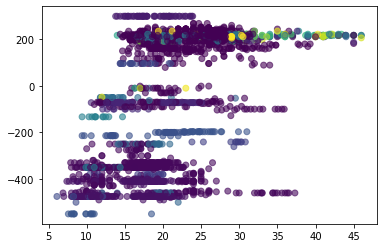

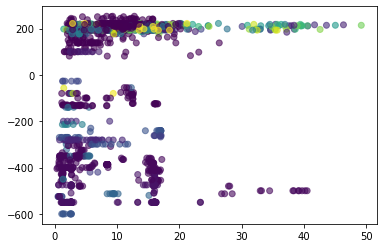

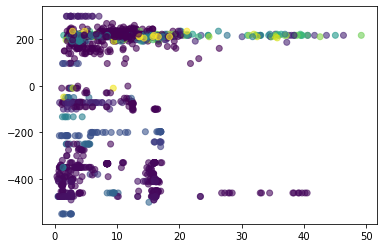

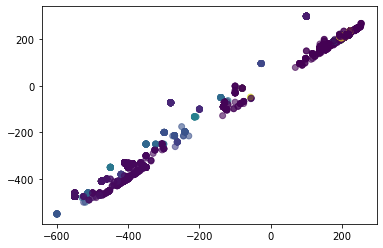

In [45]:
data["labels"] = labels
data_org_notnan = data[data["labels"]!=-1]
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.weight, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.startdate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.maxdiam, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.weight, data_org_notnan.startdate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.weight, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
plt.scatter(data_org_notnan.startdate, data_org_notnan.enddate, c=data_org_notnan.labels, alpha = 0.6)
plt.show()
